In [1]:
from showdataset import Ai_data_set
from modelCPMWeight import CPMModel,numofparts,numoflinks
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def imshow(x,y):
    fig = plt.gcf();fig.set_size_inches(8, 8);plt.title(x); plt.imshow(y);plt.show()

/home/teddy/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/teddy/anaconda2/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/home/teddy/anaconda2/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/home/teddy/anaconda2/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata shoul

In [2]:
train_data = Ai_data_set(10,"mpi_inf.db")

(368, 368, 3)


/home/teddy/anaconda2/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/teddy/anaconda2/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


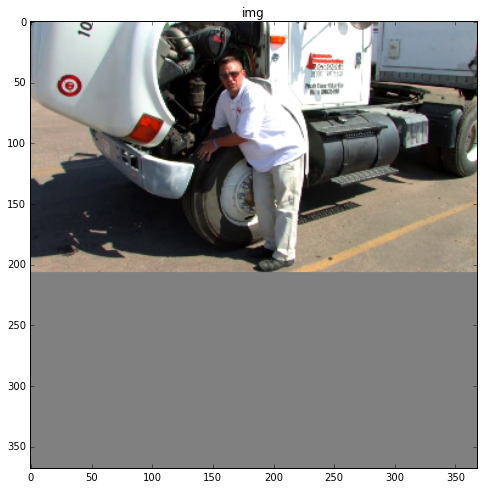

1.0


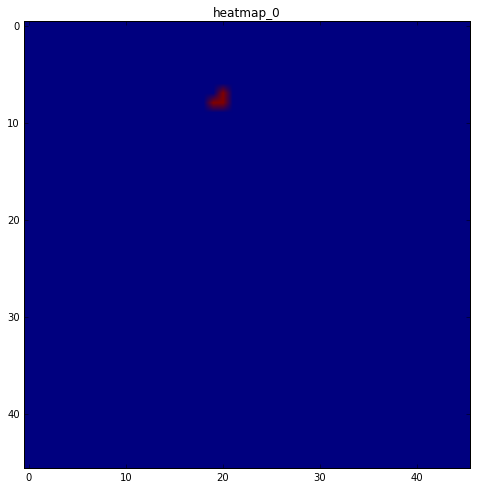

1.0


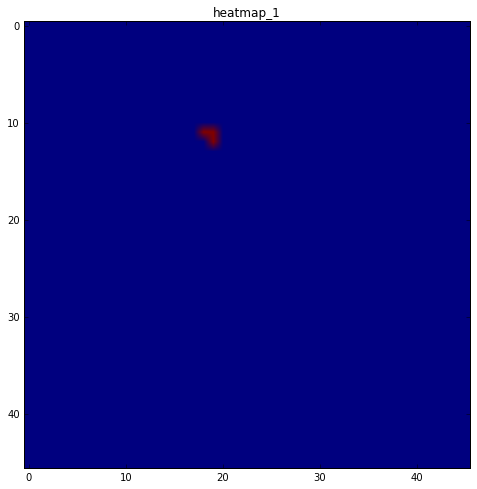

1.0


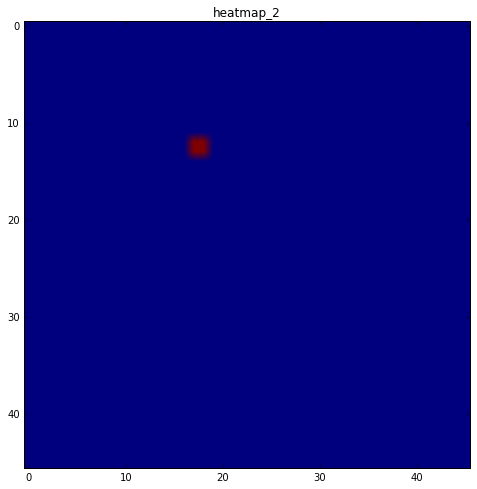

1.0


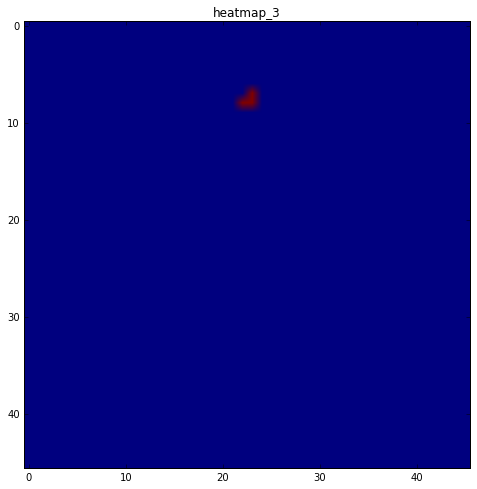

1.0


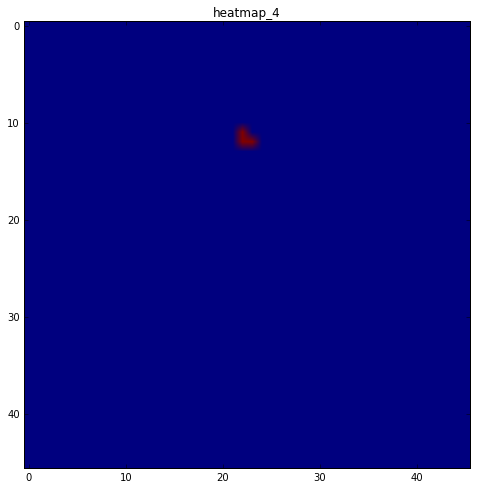

1.0


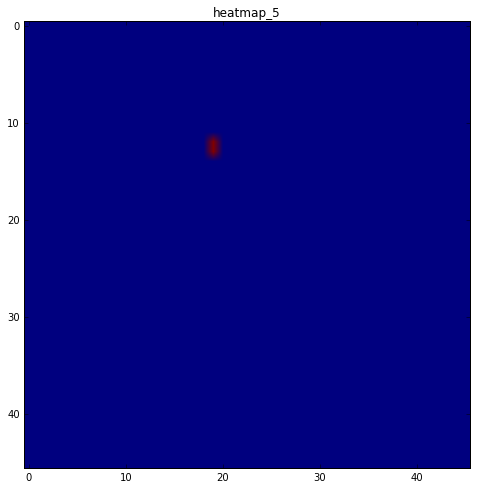

1.0


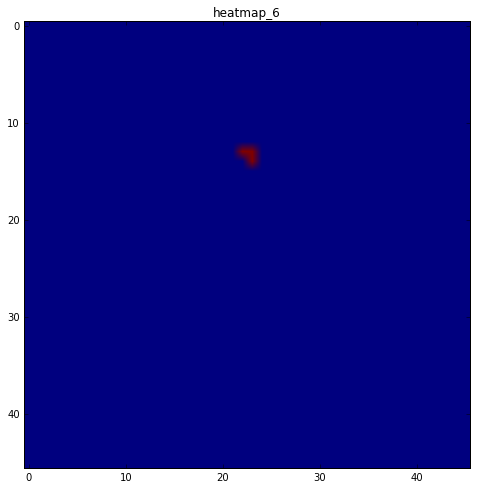

1.0


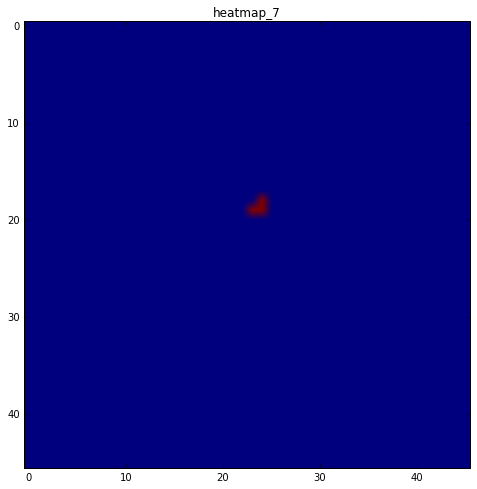

1.0


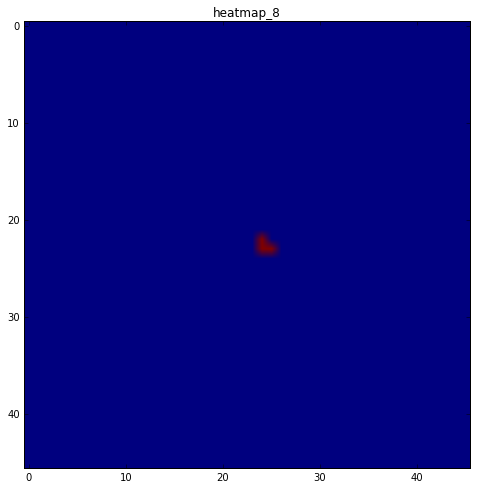

1.0


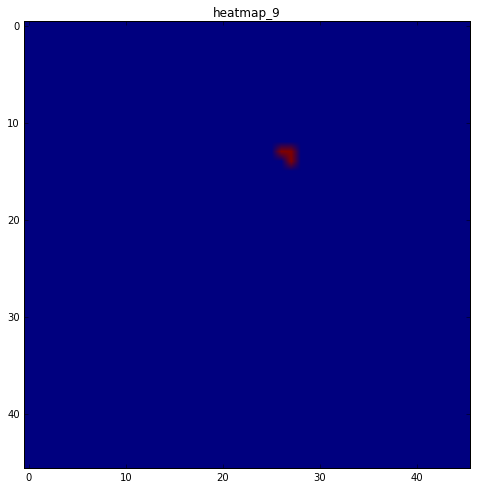

1.0


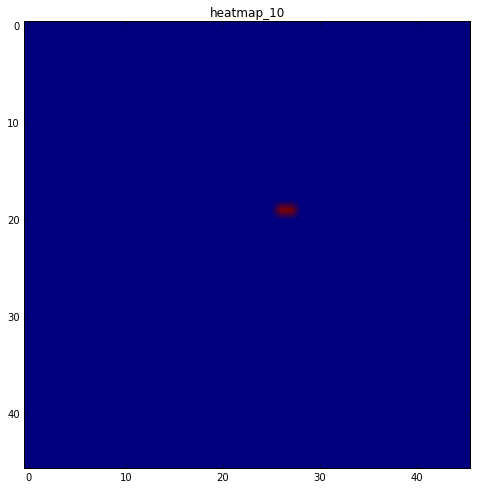

1.0


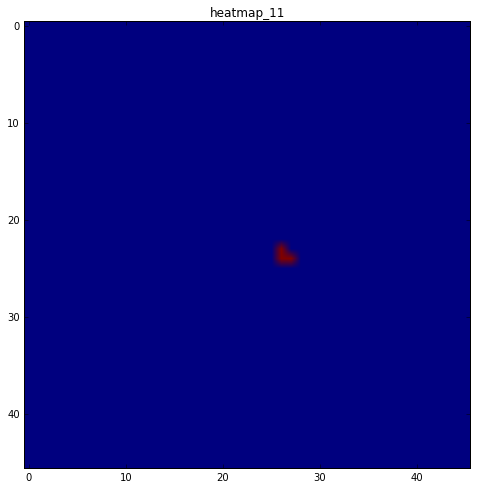

1.0


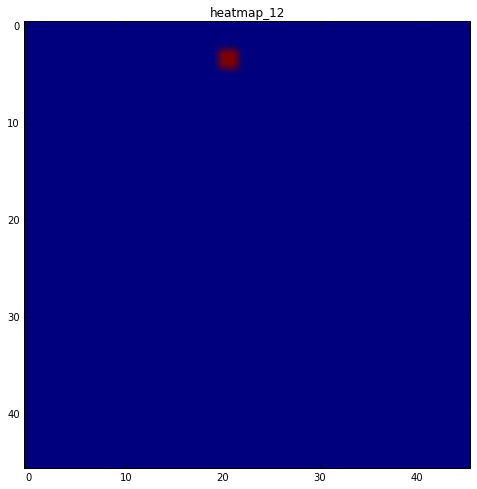

1.0


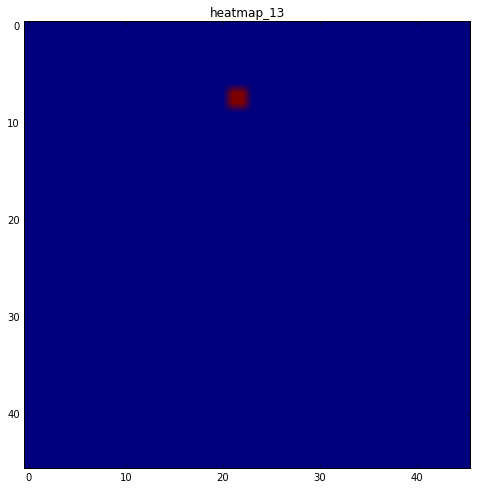

1.0


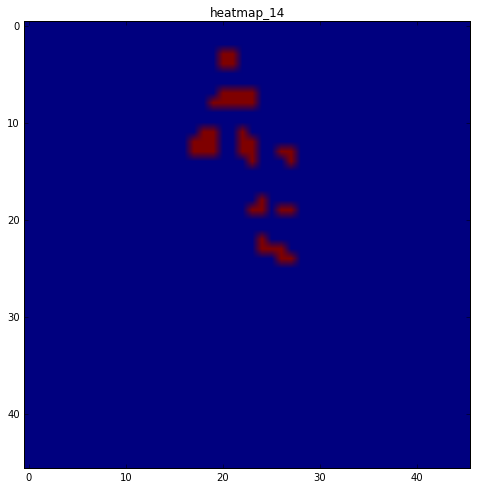

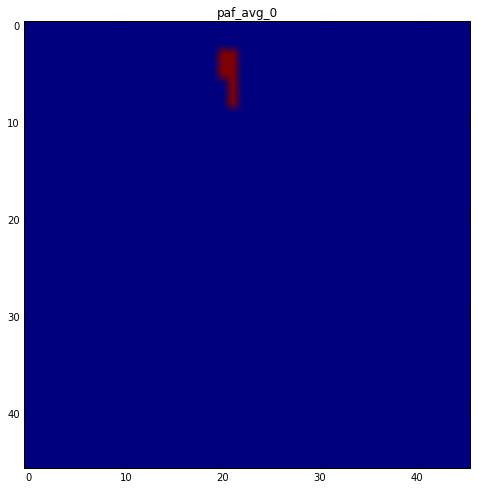

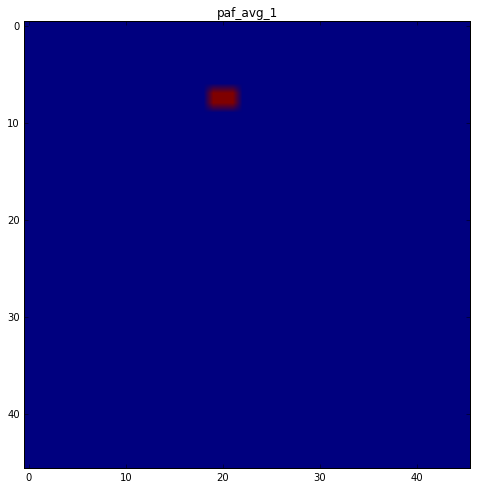

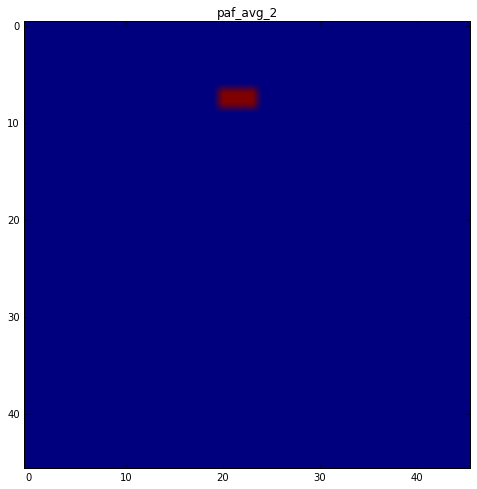

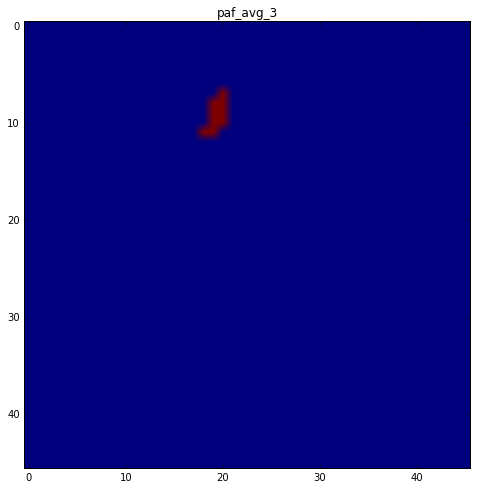

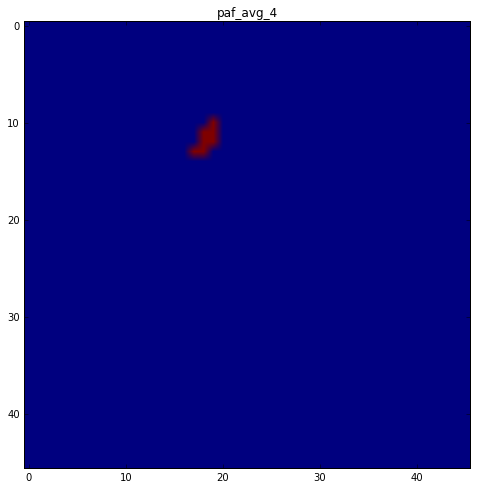

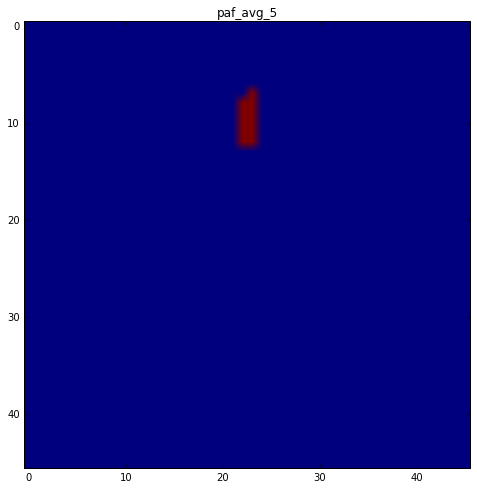

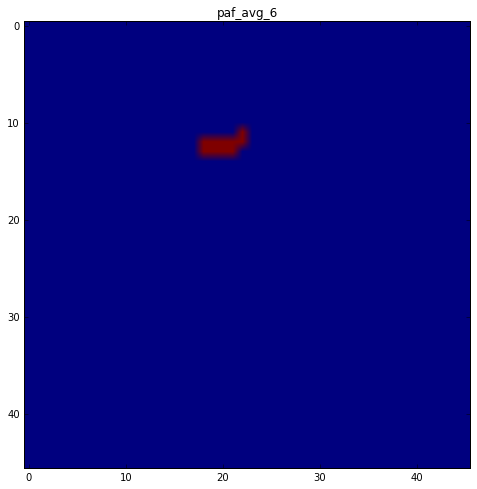

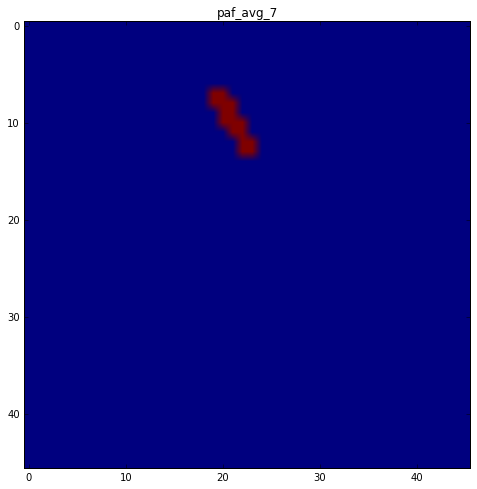

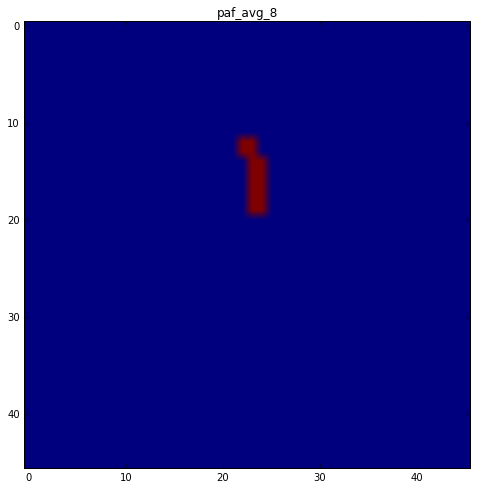

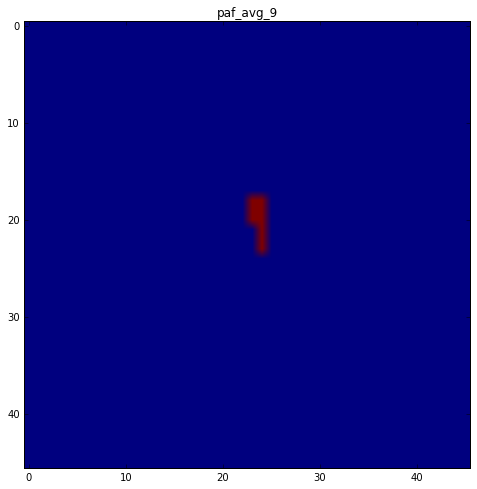

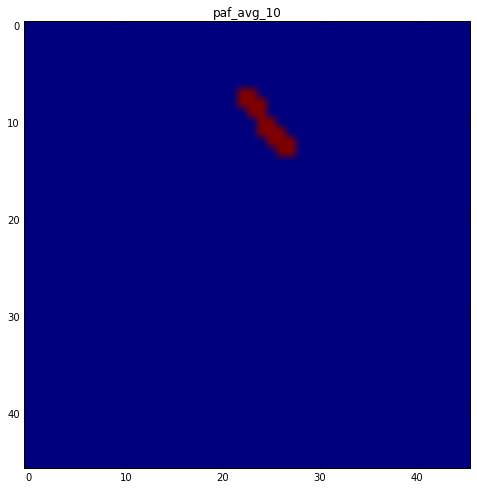

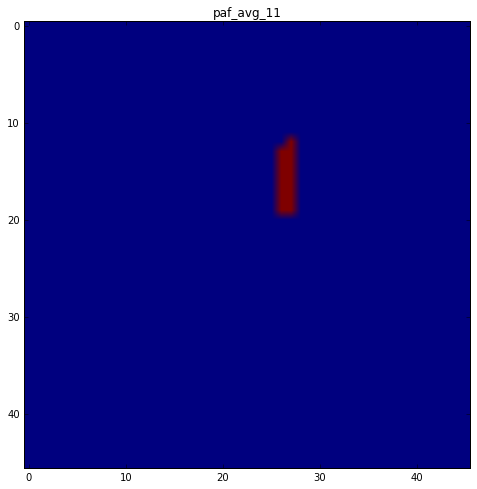

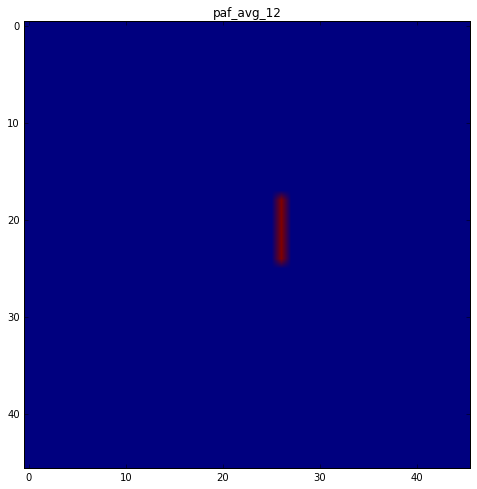

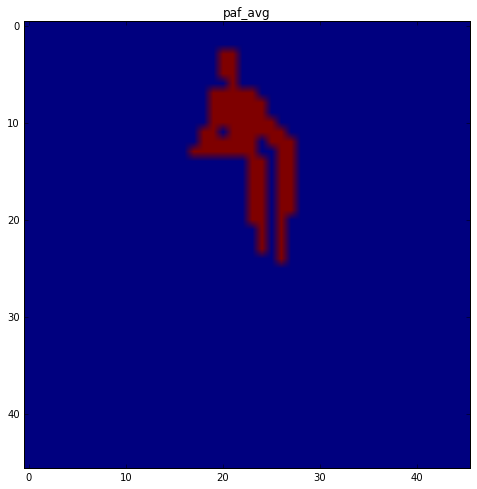

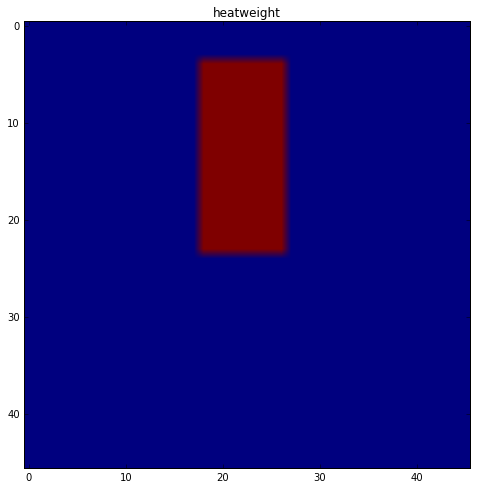

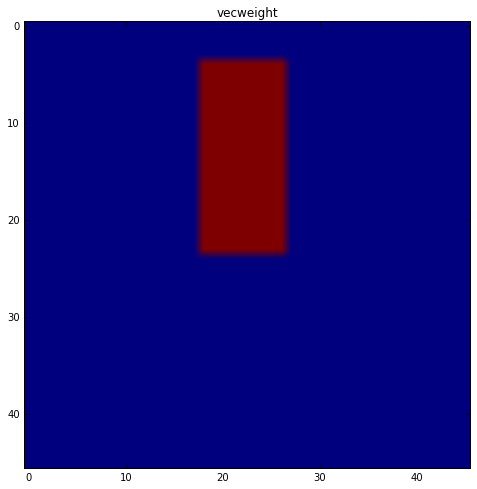

(368, 368, 3)


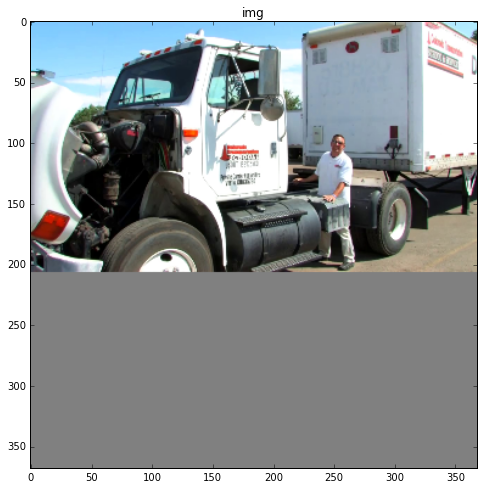

1.0


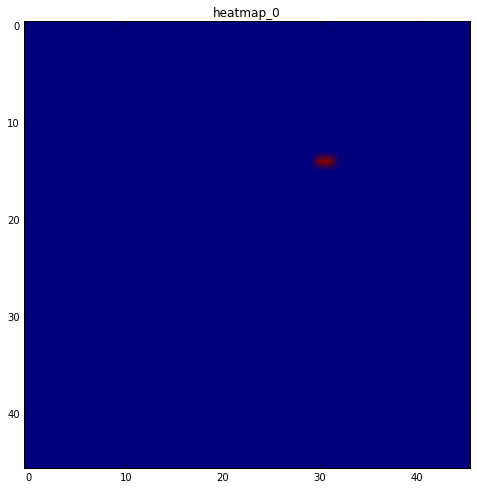

1.0


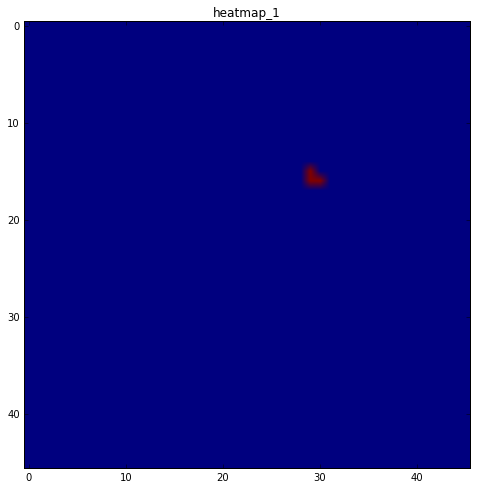

1.0


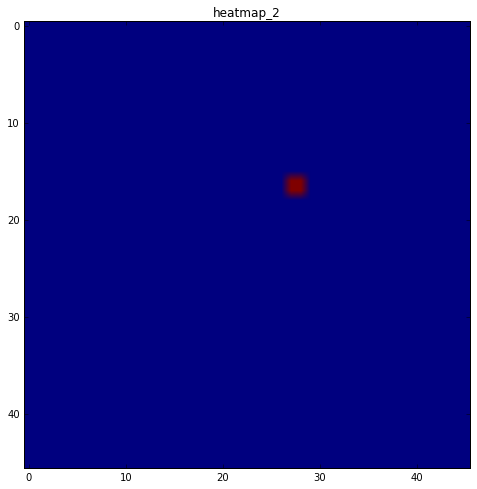

1.0


KeyboardInterrupt: 

In [3]:
for nbatch,data_batch in enumerate(train_data):
    heatmap_batch,pagmap_batch,heatweight_batch,vecweight_batch = data_batch.label
    images = data_batch.data[0]
    for img,heatmap,pagmap,heatweight,vecweight in zip(
            images,heatmap_batch,pagmap_batch,heatweight_batch,vecweight_batch):
        img = np.uint8((img.asnumpy()+0.5)*255)
        heatmap = heatmap.asnumpy()
        pagmap = pagmap.asnumpy()
        img = np.transpose(img,[1,2,0])
        img = img[:,:,(2,1,0)]
        pprint(img.shape)
        imshow("img",img)
#         pprint(paf.shape)
        for i in range(15):
            pprint(np.max(heatmap[i,:,:]))
            imshow("heatmap_{0}".format(i),heatmap[i,:,:] )        
        pafs = []
        for i in range(13):
            paf = np.sqrt(pagmap[i * 2,:,:].astype(np.float32) ** 2 +
                          pagmap[i *2 +1,:,:].astype(np.float32) **2) 
            pafs.append(paf)
            imshow("paf_avg_{0}".format(i),paf)
        imshow("paf_avg",np.max(pafs,axis = 0))    
        imshow("heatweight",heatweight[0].asnumpy())
        imshow("vecweight",vecweight[0].asnumpy())